# Assignment 2 NLP

## Haroon Wajid 21i-1763

In [24]:
import pandas as pd

# Load the data
clip_durations = pd.read_csv('clip_durations.tsv', sep='\t')
dev_data = pd.read_csv('dev.tsv', sep='\t')
invalidated_data = pd.read_csv('invalidated.tsv', sep='\t')
other_data = pd.read_csv('other.tsv', sep='\t')
reported_data = pd.read_csv('reported.tsv', sep='\t')
test_data = pd.read_csv('test.tsv', sep='\t')
train_data = pd.read_csv('train.tsv', sep='\t')
unvalidated_sentences_data = pd.read_csv('unvalidated_sentences.tsv', sep='\t')
validated_sentences_data = pd.read_csv('validated_sentences.tsv', sep='\t')
validated_data = pd.read_csv('validated.tsv', sep='\t')

In [26]:
# View the column names and data types
print(validated_data.info())

# Basic statistics of numeric columns
print(validated_data.describe())

# Sample data from the 'validated.tsv'
print(validated_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52144 entries, 0 to 52143
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        52144 non-null  object 
 1   path             52144 non-null  object 
 2   sentence_id      52144 non-null  object 
 3   sentence         52144 non-null  object 
 4   sentence_domain  0 non-null      float64
 5   up_votes         52144 non-null  int64  
 6   down_votes       52144 non-null  int64  
 7   age              47202 non-null  object 
 8   gender           47234 non-null  object 
 9   accents          8865 non-null   object 
 10  variant          0 non-null      float64
 11  locale           52144 non-null  object 
 12  segment          0 non-null      float64
dtypes: float64(3), int64(2), object(8)
memory usage: 5.2+ MB
None
       sentence_domain     up_votes    down_votes  variant  segment
count              0.0  52144.00000  52144.000000      0.0      0.

In [39]:
#print(validated_data['sentence'].head)
print(validated_data['sentence'].tail)

<bound method NDFrame.tail of 0                                   بے ذوق نہیں اگرچہ فطرت
1                              یہی تناسب "یوتھ" کا بھی ہے۔
2        اس کا مخمصہ یہ ہے کہ عوامی تائید نوازشریف کے س...
3                           یہاں سیکڑوں کارواں اور بھی ہیں
4        پاکستان کیلئےبیل اٹ پیکج امریکا نے ائی ایم ایف...
                               ...                        
52139                                 اس میں کیا خرابی ہے؟
52140          ماضی کی چیزوں کے بارے میں فکر مند نہیں ہوتا
52141    لوگوں کے چہروں پر مسکراہٹ بکھیرنے والی مشہور و...
52142                                     ریلائنس نے تاریخ
52143                                      تم پریشان مت ہو
Name: sentence, Length: 52144, dtype: object>


In [40]:
# Merge datasets on recording ID
merged_data = pd.merge(validated_data, clip_durations, left_on='path', right_on='clip')

In [55]:
urdu_sentences = merged_data['sentence'].tolist()
urdu_sentences[:3]


In [67]:
import pandas as pd

filtered_data = merged_data[~merged_data['sentence'].str.contains(r'[a-zA-Z0-9]', regex=True)]
word_cloud_data = " ".join(filtered_data['sentence'].astype(str))
# Now, 'filtered_data' will contain only rows where the sentence has no numbers or English alphabets

In [66]:
filtered_data['sentence'].head()

0                               بے ذوق نہیں اگرچہ فطرت
1                          یہی تناسب "یوتھ" کا بھی ہے۔
2    اس کا مخمصہ یہ ہے کہ عوامی تائید نوازشریف کے س...
3                       یہاں سیکڑوں کارواں اور بھی ہیں
4    پاکستان کیلئےبیل اٹ پیکج امریکا نے ائی ایم ایف...
Name: sentence, dtype: object

In [6]:
# Check for missing values
missing_values = validated_data.isnull().sum()
print(missing_values)

# Optionally, you can drop or fill missing values if needed
validated_data.dropna(inplace=True)  # to drop missing values
# Or fill missing values with a placeholder or mean
validated_data.fillna(0, inplace=True)

client_id              0
path                   0
sentence_id            0
sentence               0
sentence_domain    52144
up_votes               0
down_votes             0
age                 4942
gender              4910
accents            43279
variant            52144
locale                 0
segment            52144
dtype: int64


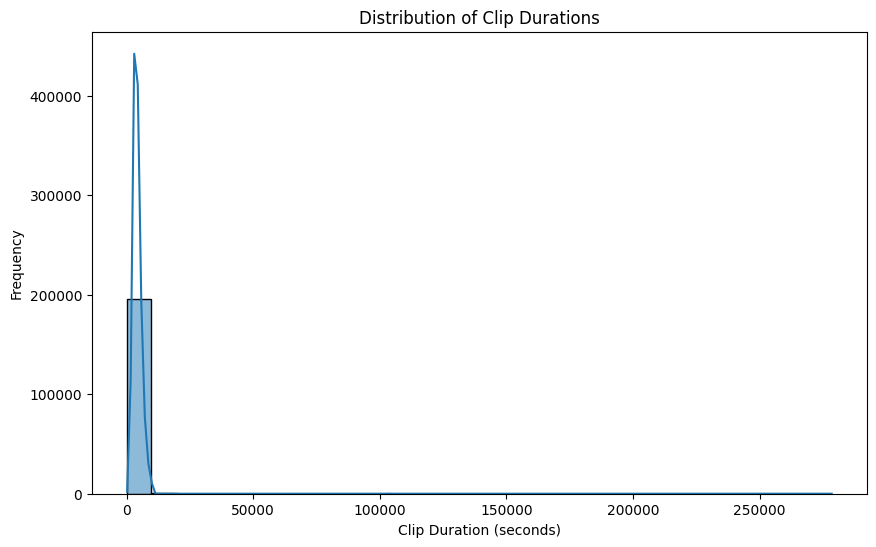

count    196558.000000
mean       4246.105658
std        3371.821598
min         216.000000
25%        2916.000000
50%        3888.000000
75%        5040.000000
max      278460.000000
Name: duration[ms], dtype: float64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clip duration distribution from 'clip_durations.tsv'
plt.figure(figsize=(10, 6))
sns.histplot(clip_durations['duration[ms]'], bins=30, kde=True)
plt.title('Distribution of Clip Durations')
plt.xlabel('Clip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Analyze statistics of clip durations
print(clip_durations['duration[ms]'].describe())

# extract audio features

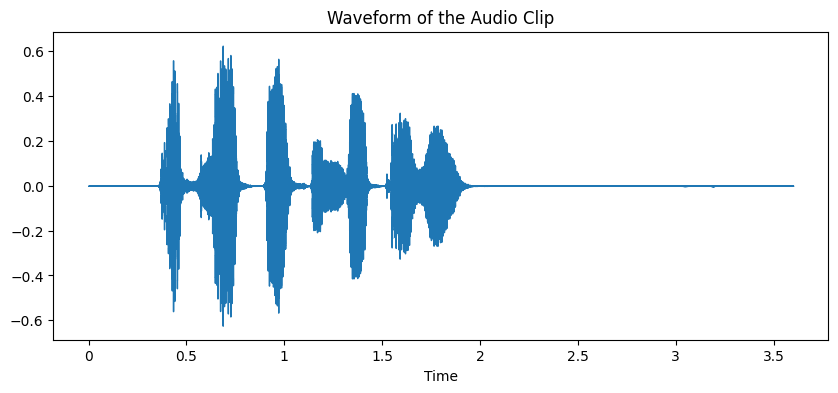

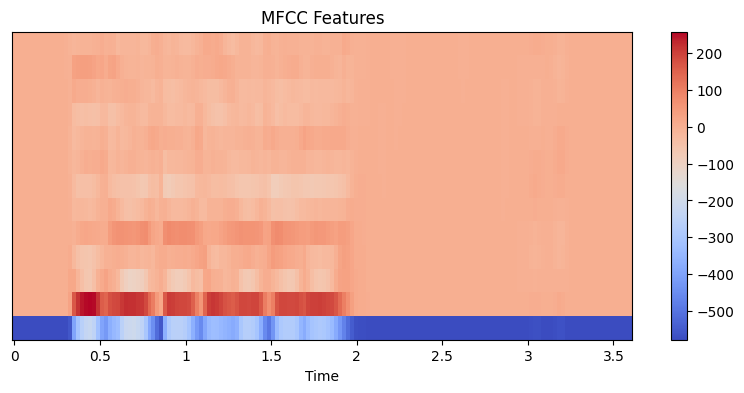

In [10]:
import librosa
import librosa.display

# Load an audio file
audio_file = 'clips/common_voice_ur_26562732.mp3'
y, sr = librosa.load(audio_file)

# Display waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of the Audio Clip')
plt.show()

# Extract Mel-frequency cepstral coefficients (MFCC)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC Features')
plt.show()

# Data Distribution Analysis

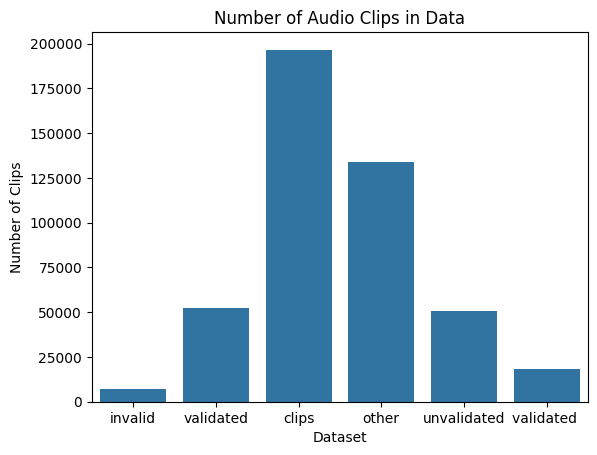

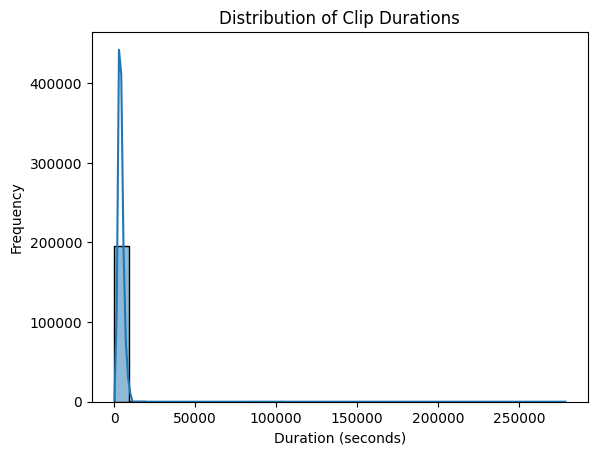

In [86]:
# Distribution of audio clips per dataset
datasets = ['invalid','validated', 'clips', 'other', 'unvalidated', 'validated ']
clip_counts = [invalidated_data.shape[0],validated_data.shape[0], clip_durations.shape[0], other_data.shape[0],unvalidated_sentences_data.shape[0],validated_sentences_data.shape[0]  ]
                        

sns.barplot(x=datasets, y=clip_counts)
plt.title('Number of Audio Clips in Data')
plt.xlabel('Dataset')
plt.ylabel('Number of Clips')
plt.show()

# Clip duration distribution
sns.histplot(clip_durations['duration[ms]'], bins=30, kde=True)
plt.title('Distribution of Clip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


# Speaker and Accent Diversity

Total number of unique speakers: 308


/Users/haroonwajid/Desktop/cv-corpus-18.0-2024-06-14/ur/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haroonwajid/Desktop/cv-corpus-18.0-2024-06-14/ur/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haroonwajid/Desktop/cv-corpus-18.0-2024-06-14/ur/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haroonwajid/Desktop/cv-corpus-18.0-2024-06-14/ur/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 1748 (\N{ARABIC FULL STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


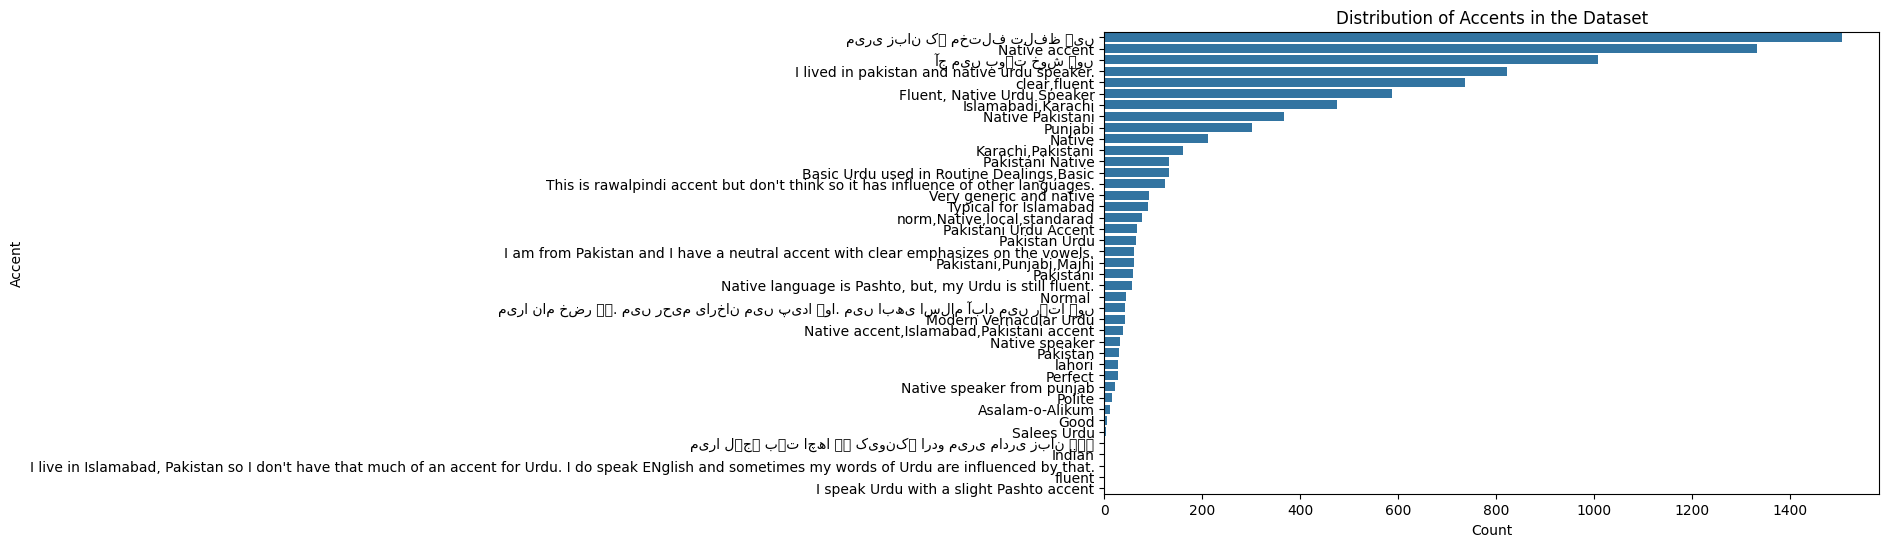

In [12]:
# Count unique speakers
num_speakers = merged_data['client_id'].nunique()
print(f'Total number of unique speakers: {num_speakers}')

# Accent diversity
plt.figure(figsize=(10, 6))
sns.countplot(y='accents', data=merged_data, order=merged_data['accents'].value_counts().index)
plt.title('Distribution of Accents in the Dataset')
plt.xlabel('Count')
plt.ylabel('Accent')
plt.show()

#  Word Frequency Analysis

In [13]:
print(type(merged_data['sentence']))


<class 'pandas.core.series.Series'>


In [14]:
from transformers import AutoTokenizer, AutoModel

# Load a pre-trained Urdu model from Hugging Face
tokenizer = AutoTokenizer.from_pretrained("urduhack/roberta-urdu-small")
model = AutoModel.from_pretrained("urduhack/roberta-urdu-small")

# Tokenize Urdu text
text = urdu_sentences[1]
tokens = tokenizer(text, return_tensors="pt")

# Print tokenized output
print(tokens)


/Users/haroonwajid/Desktop/cv-corpus-18.0-2024-06-14/ur/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/haroonwajid/Desktop/cv-corpus-18.0-2024-06-14/ur/myenv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


{'input_ids': tensor([[    0,  4058,  7571,  3696, 16088,     6,   333,   370,   316,  1842,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


# Urdu Text Tokenizer

In [87]:
from transformers import AutoTokenizer

# Load the pre-trained tokenizer
tokenizer = AutoTokenizer.from_pretrained("urduhack/roberta-urdu-small")

# Sample Urdu text
text = urdu_sentences[1]

# Tokenize the text
encoded = tokenizer(text, return_tensors="pt")

# Decode the token IDs to get the Urdu text
decoded_text = tokenizer.decode(encoded['input_ids'][0], skip_special_tokens=True)

print("Original text:", text)
print("Encoded text:", encoded)
print("Decoded text:", decoded_text)


Original text: یہی تناسب "یوتھ" کا بھی ہے۔
Encoded text: {'input_ids': tensor([[    0,  4058,  7571,  3696, 16088,     6,   333,   370,   316,  1842,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
Decoded text: یہی تناسب "یوتھ" کا بھی ہے۔


/Users/haroonwajid/Desktop/cv-corpus-18.0-2024-06-14/ur/myenv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


# audio quality analysis

Signal-to-Noise Ratio (SNR): 1.5531578867467033e-06 dB


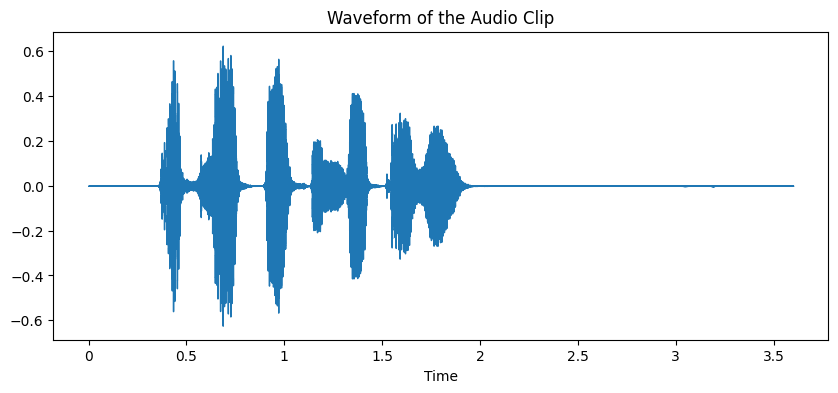

In [16]:
import librosa
import numpy as np

# Function to calculate SNR
def calculate_snr(y):
    signal_power = np.mean(y ** 2)
    noise_power = np.mean((y - np.mean(y)) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Load and analyze audio file for quality
audio_file = 'clips/common_voice_ur_26562732.mp3'
y, sr = librosa.load(audio_file)

# Calculate SNR for the audio file
snr = calculate_snr(y)
print(f'Signal-to-Noise Ratio (SNR): {snr} dB')

# Compute and display the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of the Audio Clip')
plt.show()



# Meta data Analysis

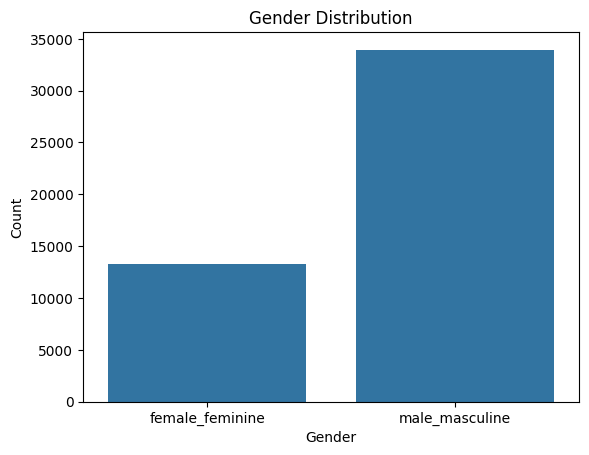

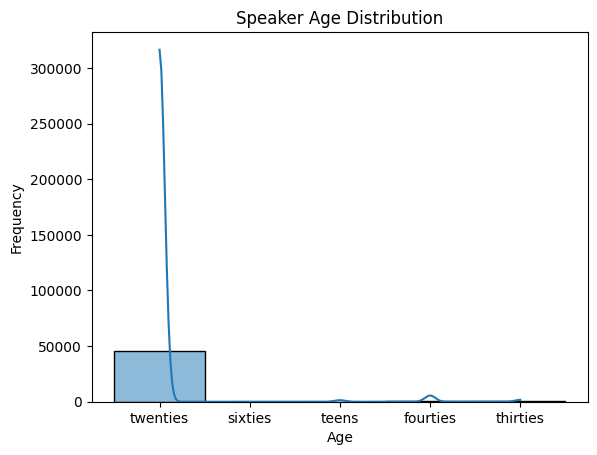

In [17]:
# Analyze gender distribution
sns.countplot(x='gender', data=merged_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Analyze speaker age distribution
sns.histplot(merged_data['age'], bins=10, kde=True)
plt.title('Speaker Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


/var/folders/c6/fv92bt5n2yz0dglz86rpq15r0000gn/T/ipykernel_18208/1950326786.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['speaker_value'] = filtered_data['client_id'].map(speaker_mapping)
/var/folders/c6/fv92bt5n2yz0dglz86rpq15r0000gn/T/ipykernel_18208/1950326786.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['speaker_value'] = filtered_data['client_id'].map(speaker_mapping)


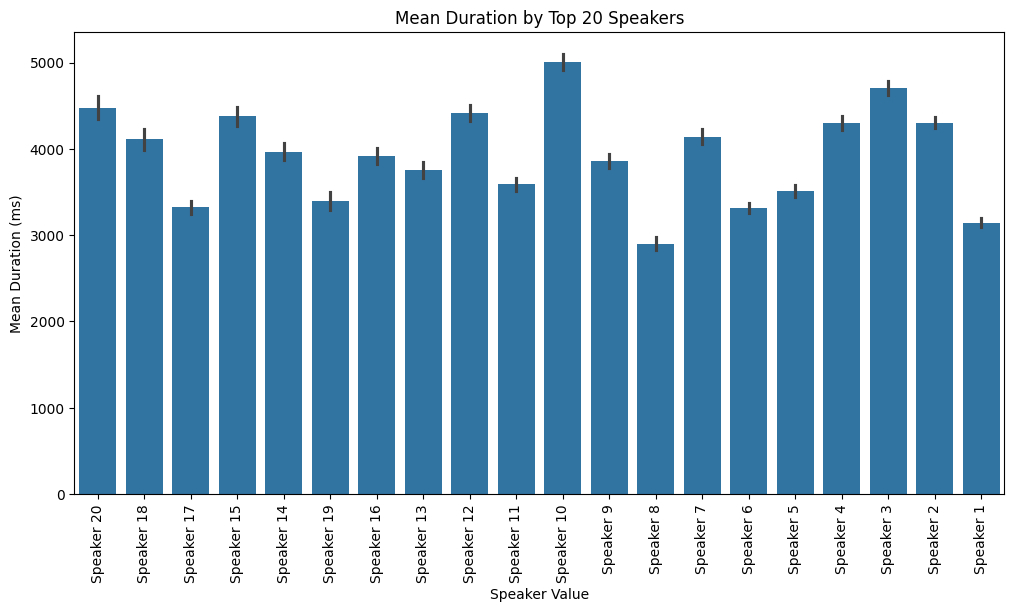

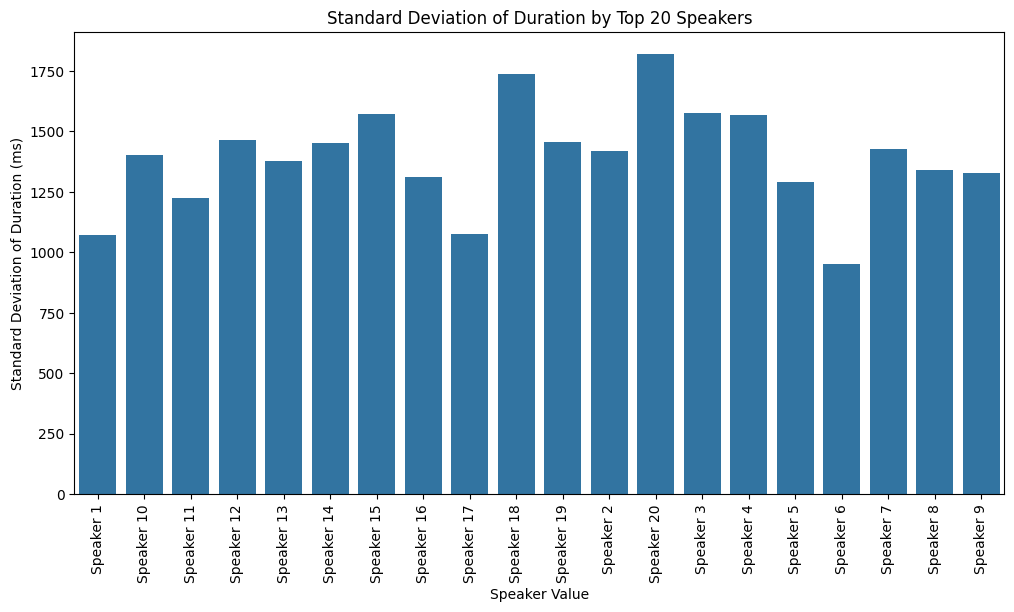

In [18]:
# Count the number of recordings per speaker
speaker_counts = merged_data['client_id'].value_counts()

# Get the top 20 speakers
top_speakers = speaker_counts.head(20).index

# Filter the DataFrame for these top 20 speakers
filtered_data = merged_data[merged_data['client_id'].isin(top_speakers)]

# Create a mapping for the top 20 speakers
speaker_mapping = {speaker: idx for idx, speaker in enumerate(top_speakers)}

# Add the numerical value to the filtered DataFrame
filtered_data['speaker_value'] = filtered_data['client_id'].map(speaker_mapping)

# Create a mapping for the top 20 speakers
speaker_mapping = {speaker: f'Speaker {idx + 1}' for idx, speaker in enumerate(top_speakers)}

# Add the categorical value to the filtered DataFrame
filtered_data['speaker_value'] = filtered_data['client_id'].map(speaker_mapping)

import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot mean duration by speaker value
plt.figure(figsize=(12, 6))
sns.barplot(x='speaker_value', y='duration[ms]', data=filtered_data)
plt.xticks(rotation=90)
plt.xlabel('Speaker Value')
plt.ylabel('Mean Duration (ms)')
plt.title('Mean Duration by Top 20 Speakers')
plt.show()

# Example: Plot standard deviation of duration by speaker value
plt.figure(figsize=(12, 6))
sns.barplot(x='speaker_value', y='duration[ms]', data=filtered_data.groupby('speaker_value').agg({'duration[ms]': 'std'}).reset_index())
plt.xticks(rotation=90)
plt.xlabel('Speaker Value')
plt.ylabel('Standard Deviation of Duration (ms)')
plt.title('Standard Deviation of Duration by Top 20 Speakers')
plt.show()

In [8]:
import whisper

# Load the Whisper model
model = whisper.load_model("base")  # You can choose different models: base, small, medium, large

# Transcribe the audio file
result = model.transcribe("clips/common_voice_ur_28976627.mp3", language="ur")

# Print the transcription
print(result['text'])


/Users/haroonwajid/Desktop/cv-corpus-18.0-2024-06-14/ur/myenv/lib/python3.12/site-packages/whisper/__init__.py:146: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint 

 یہی تناسوب یوت کا بھی ہے


# VGGish (Audio Embeddings)
VGGish is a TensorFlow model that extracts embeddings from audio files, often used for tasks like classification and event detection. The embeddings can be used to perform clustering or visualization to explore audio similarities.

In [20]:
import tensorflow_hub as hub
import numpy as np
import tensorflow as tf
import librosa

# Load VGGish model
vggish_model = hub.load('https://tfhub.dev/google/vggish/1')

# Load and preprocess the audio
y, sr = librosa.load('clips/common_voice_ur_28976627.mp3', sr=16000)

# Ensure waveform is a 1D array
waveform = np.array(y, dtype=np.float32)  # Ensure type is float32

# Convert to tensor
waveform_tensor = tf.convert_to_tensor(waveform, dtype=tf.float32)

# Extract embeddings
embeddings = vggish_model(waveform_tensor)

print(embeddings.shape)  # Use these embeddings for further analysis


(2, 128)


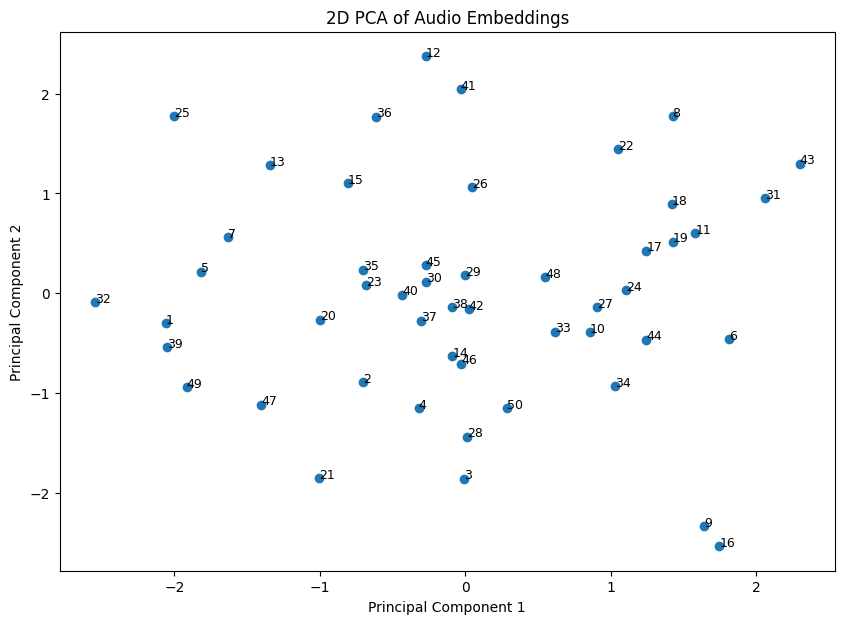

In [21]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import librosa
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load VGGish model
vggish_model = hub.load('https://tfhub.dev/google/vggish/1')

def extract_embedding(file_path):
    # Load and preprocess the audio
    y, sr = librosa.load(file_path, sr=16000)
    
    # Ensure waveform is a 1D array
    waveform = np.array(y, dtype=np.float32)
    
    # Convert to tensor
    waveform_tensor = tf.convert_to_tensor(waveform, dtype=tf.float32)
    
    # Extract embeddings
    embeddings = vggish_model(waveform_tensor)
    return embeddings.numpy().flatten()  # Flatten to 1D vector if needed

def pad_or_truncate_embedding(embedding, target_length=128):
    if len(embedding) < target_length:
        # Pad with zeros if embedding is shorter than target length
        return np.pad(embedding, (0, target_length - len(embedding)), 'constant')
    else:
        # Truncate if embedding is longer than target length
        return embedding[:target_length]

# Folder containing audio files
folder_path = 'clips'

# List all audio files in the folder
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.mp3')]

# Select the first 10 files (or fewer if there are not 10)
selected_files = all_files[:50]

# Extract and pad/truncate embeddings for selected audio files
all_embeddings = [pad_or_truncate_embedding(extract_embedding(file), target_length=128) for file in selected_files]
all_embeddings = np.array(all_embeddings)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(all_embeddings)

# Plot the 2D embeddings
plt.figure(figsize=(10, 7))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

# Annotate the plot with numbers
for i in range(len(selected_files)):
    plt.annotate(f'{i+1}', (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=9)

plt.title('2D PCA of Audio Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


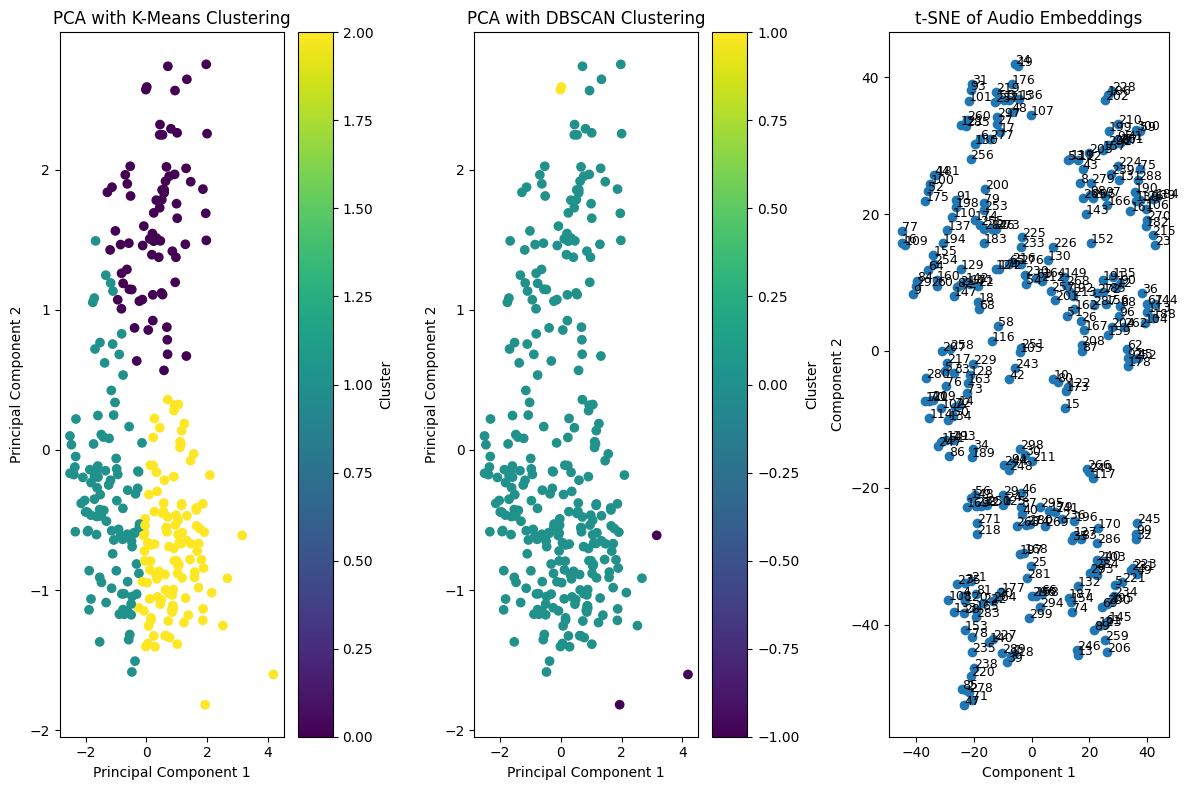

In [22]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import librosa
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN

# Load VGGish model
vggish_model = hub.load('https://tfhub.dev/google/vggish/1')

def extract_embedding(file_path):
    # Load and preprocess the audio
    y, sr = librosa.load(file_path, sr=16000)
    waveform = np.array(y, dtype=np.float32)
    waveform_tensor = tf.convert_to_tensor(waveform, dtype=tf.float32)
    embeddings = vggish_model(waveform_tensor)
    return embeddings.numpy().flatten()

def pad_or_truncate_embedding(embedding, target_length=128):
    if len(embedding) < target_length:
        return np.pad(embedding, (0, target_length - len(embedding)), 'constant')
    else:
        return embedding[:target_length]

# Folder containing audio files
folder_path = 'clips'
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.mp3')]
selected_files = all_files[:300]

# Extract and pad/truncate embeddings for selected audio files
all_embeddings = [pad_or_truncate_embedding(extract_embedding(file), target_length=128) for file in selected_files]
all_embeddings = np.array(all_embeddings)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(all_embeddings)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)
clusters_kmeans = kmeans.fit_predict(reduced_embeddings)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters_dbscan = dbscan.fit_predict(reduced_embeddings)

# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=0)  # Set perplexity less than number of samples
reduced_embeddings_tsne = tsne.fit_transform(all_embeddings)

# Plot PCA results with K-Means clustering
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
scatter_kmeans = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters_kmeans, cmap='viridis')
plt.title('PCA with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter_kmeans, label='Cluster')

# Plot PCA results with DBSCAN clustering
plt.subplot(1, 3, 2)
scatter_dbscan = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters_dbscan, cmap='viridis')
plt.title('PCA with DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter_dbscan, label='Cluster')

# Plot t-SNE results
plt.subplot(1, 3, 3)
plt.scatter(reduced_embeddings_tsne[:, 0], reduced_embeddings_tsne[:, 1])

# Annotate the plot with numbers
for i in range(len(selected_files)):
    plt.annotate(f'{i+1}', (reduced_embeddings_tsne[i, 0], reduced_embeddings_tsne[i, 1]), fontsize=9)

plt.title('t-SNE of Audio Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.tight_layout()
plt.show()


In [9]:
import warnings
import os

# Suppress FP16 warning on CPU
warnings.filterwarnings("ignore", message="FP16 is not supported on CPU")

# Disable Hugging Face Tokenizers parallelism warning
os.environ["TOKENIZERS_PARALLELISM"] = "false"


/Users/haroonwajid/Desktop/cv-corpus-18.0-2024-06-14/ur/myenv/lib/python3.12/site-packages/whisper/__init__.py:146: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint 

Transcribing common_voice_ur_31971997.mp3...
Transcribing common_voice_ur_31918921.mp3...
Transcribing common_voice_ur_31926617.mp3...
Transcribing common_voice_ur_32013582.mp3...
Transcribing common_voice_ur_31844086.mp3...
Transcribing common_voice_ur_32022987.mp3...
Transcribing common_voice_ur_32033652.mp3...
Transcribing common_voice_ur_38444676.mp3...
Transcribing common_voice_ur_38423835.mp3...
Transcribing common_voice_ur_32003791.mp3...
Transcribing common_voice_ur_31874145.mp3...
Transcribing common_voice_ur_32012844.mp3...
Transcribing common_voice_ur_38443119.mp3...
Transcribing common_voice_ur_38465860.mp3...
Transcribing common_voice_ur_31970451.mp3...
Transcribing common_voice_ur_32054811.mp3...
Transcribing common_voice_ur_33938250.mp3...
Transcribing common_voice_ur_38480152.mp3...
Transcribing common_voice_ur_38454465.mp3...
Transcribing common_voice_ur_31941854.mp3...
Transcribing common_voice_ur_32023441.mp3...
Transcribing common_voice_ur_38412430.mp3...
Transcribi

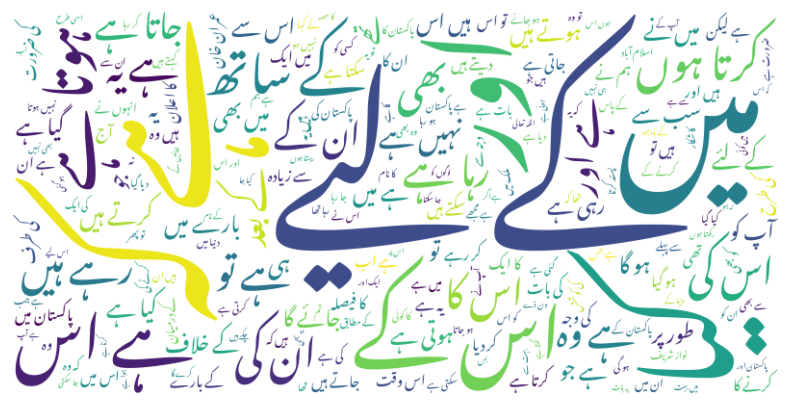

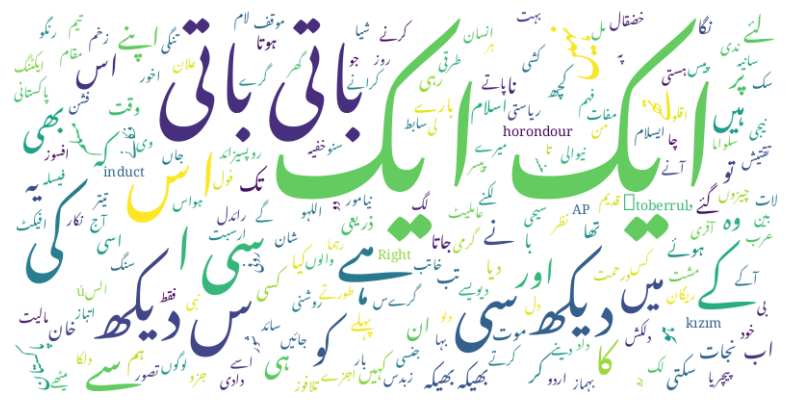

In [69]:
import os
import whisper
from wordcloud import WordCloud
import matplotlib.pyplot as plt

urdu_font_path = "NotoNastaliqUrdu-Regular.ttf"  

# Initialize Whisper model
model = whisper.load_model("base")

# Path to the folder containing audio files
audio_folder = "clips"

# Function to transcribe up to 100 audio files using Whisper
def transcribe_audio(folder, max_files=100):
    transcriptions = []
    count = 0
    for filename in os.listdir(folder):
        if count >= max_files:
            break
        if filename.endswith(".mp3") or filename.endswith(".wav"):
            audio_path = os.path.join(folder, filename)
            print(f"Transcribing {filename}...")
            result = model.transcribe(audio_path, language="ur")
            transcriptions.append(result["text"])
            count += 1
    return " ".join(transcriptions)

# Generate the word cloud with Urdu font
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=urdu_font_path).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Main code
if __name__ == "__main__":
    transcription_text = transcribe_audio(audio_folder, max_files=100)
    generate_wordcloud(word_cloud_data)
    generate_wordcloud(transcription_text)


# Sentiment Analysis 

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import json

# Load data from JSON file
with open('urdu_sentiment_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Extract texts and labels
texts = [item['text'] for item in data]
labels = [item['label'] for item in data]

# Split the data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Initialize tokenizer

model_name = 'urduhack/roberta-urdu-small'
tokenizer = RobertaTokenizer.from_pretrained(model_name)

class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = [int(label) for label in labels]  # Ensure labels are integers
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

max_length = 128
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer, max_length)
val_dataset = SentimentDataset(val_texts, val_labels, tokenizer, max_length)

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8)

# Define device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


In [90]:
# Load pre-trained model
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=3)
model.to(device)

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

def train_epoch(dataloader, model, loss_fn, optimizer, device):
    model.train()
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

def eval_model(dataloader, model, loss_fn, device):
    model.eval()
    correct_predictions = 0
    total_predictions = 0
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits
            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            total_predictions += labels.size(0)
    
    return correct_predictions / total_predictions

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at urduhack/roberta-urdu-small and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
urdu_sentences[:5]

['بے ذوق نہیں اگرچہ فطرت',
 'یہی تناسب "یوتھ" کا بھی ہے۔',
 'اس کا مخمصہ یہ ہے کہ عوامی تائید نوازشریف کے ساتھ ہے۔',
 'یہاں سیکڑوں کارواں اور بھی ہیں',
 'پاکستان کیلئےبیل اٹ پیکج امریکا نے ائی ایم ایف کو خبردارکردیا']

In [91]:
# Train and evaluate
for epoch in range(3):  # Number of epochs
    train_epoch(train_dataloader, model, loss_fn, optimizer, device)
    accuracy = eval_model(val_dataloader, model, loss_fn, device)
    print(f'Epoch {epoch+1}, Validation Accuracy: {accuracy:.4f}')

def predict(texts, tokenizer, model, device, max_length=128):
    model.eval()
    encodings = tokenizer(texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='pt')
    input_ids = encodings['input_ids'].to(device)
    attention_mask = encodings['attention_mask'].to(device)
    
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
    
    return preds.cpu().numpy()

# Example usage
urdu_sentences[:240]
predictions = predict(urdu_sentences[:240], tokenizer, model, device)
print(predictions)

Epoch 1, Validation Accuracy: 0.3636
Epoch 2, Validation Accuracy: 0.4545
Epoch 3, Validation Accuracy: 0.7727
[1 0 2 2 2 1 2 2 1 2 2 2 2 2 2 2 1 0 1 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 1 1
 2 1 1 2 2 2 2 0 2 1 0 1 2 1 0 2 2 2 2 1 2 1 2 2 2 0 2 2 0 0 1 1 2 0 1 0 0
 1 2 1 2 2 2 2 1 1 2 2 1 2 0 1 2 1 0 2 2 2 1 2 1 2 2 0 0 0 2 0 2 0 2 0 2 2
 0 2 2 1 2 2 0 2 2 2 2 2 1 2 1 1 0 0 0 0 2 2 1 0 2 1 2 1 0 2 2 2 1 2 1 1 1
 2 2 2 0 1 2 0 0 2 2 1 2 2 2 2 1 2 2 2 2 2 1 1 1 1 2 2 2 1 2 1 0 2 2 1 2 1
 0 2 2 2 2 1 2 0 1 2 1 1 2 2 2 2 2 2 2 2 1 1 2 1 0 1 2 2 1 1 2 1 1 0 1 1 2
 1 1 1 0 2 1 0 2 1 2 2 2 1 2 1 1 2 0]


In [92]:
import numpy as np
from collections import Counter

# Define sentiment mappings
sentiment_mapping = {
    0: 'positive',
    1: 'neutral',
    2: 'negative'
}

def predict(texts, tokenizer, model, device, max_length=128):
    model.eval()
    encodings = tokenizer(texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='pt')
    input_ids = encodings['input_ids'].to(device)
    attention_mask = encodings['attention_mask'].to(device)
    
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
    
    return preds.cpu().numpy()

# Example usage
urdu_sentences[:250]
predictions = predict(urdu_sentences[:250], tokenizer, model, device)

# Count the number of predictions for each sentiment category
sentiment_counts = Counter(predictions)

# Map counts to sentiment labels
sentiment_summary = {sentiment_mapping[label]: sentiment_counts.get(label, 0) for label in sentiment_mapping}
print("Sentiment summary:", sentiment_summary)


Sentiment summary: {'positive': 40, 'neutral': 74, 'negative': 136}


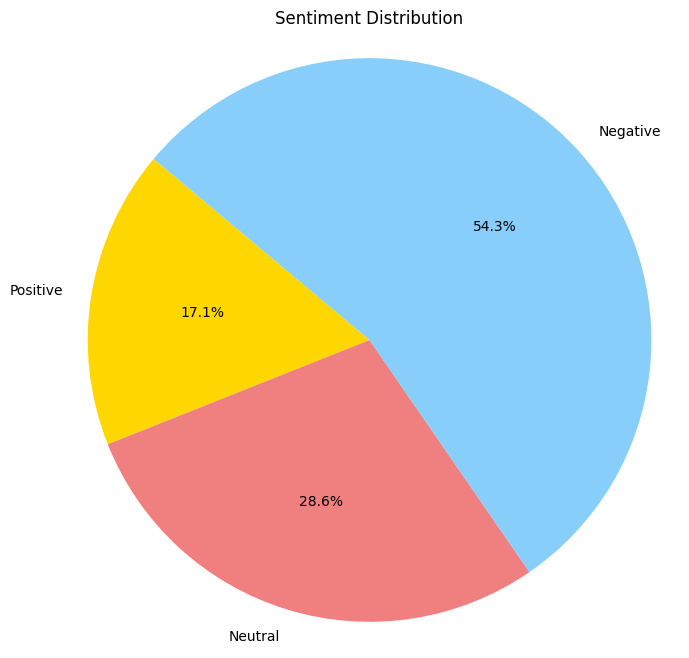

In [93]:
import matplotlib.pyplot as plt
from collections import Counter

# Define sentiment labels
sentiment_mapping = {
    0: 'Positive',
    1: 'Neutral',
    2: 'Negative'
}

predictions = predict(urdu_sentences[110:180], tokenizer, model, device)

# Count the number of predictions for each sentiment category
sentiment_counts = Counter(predictions)

# Map counts to sentiment labels
sentiment_summary = {sentiment_mapping[label]: sentiment_counts.get(label, 0) for label in sentiment_mapping}

# Data for the pie chart
labels = sentiment_summary.keys()
sizes = sentiment_summary.values()
colors = ['gold', 'lightcoral', 'lightskyblue']  # Colors for the segments

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()
